In this project, I will create a model that is trained to determine the factuality of Elon Musk's tweets. Disinformation has been on the rise in America in recent years. The main source is social media websites. This has been exacerbated by Elon Musk's purchase of Twitter. Twitter was once a website for short-form context posted by a range of users, from everyday people to professionals in all fields. After Musk's acquisition of Twitter, studies found that there was [a rise in hate speech](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0313293#) and [increased spread of fake news](https://www.science.org/doi/10.1126/science.aap9559). While this can be partially attributed to massive layoffs, meaning there is less staff to moderate content, Musk has openly promoted this kind of content. He has removed safeguards for the identification of misinformation, like the blue checkmark system. In addition, Musk has his own track record with easily proven lies. This has ranged from his stats in a popular video game to mischaracterizing government spending to shut down research and explain mass firings. Therefore, I will focus analyzing the writings from one of the key figures of the rise of disinformations on the website that he has curated for his followers. 

In the research papers linked above, one focusing on hate speach used consine simularity, Kolmogorov–Smirnov test, a logistic regression model, and the random forest algorithm. The first research paper used a model created by [Hickey et al](https://par.nsf.gov/servlets/purl/10517204) and their existing lexion of hateful words to track the frequency of those words in tweets over time. They also were able to identify bots and remove them, yet they found that the dramatic rise remained present. Additionally, the researchers used consine simularity on the tweet of certain accounts, which was one method of bot detection. The second research paper uses data from six independent fact-checking organizations. I doubt I will need that many, yet I can Then, I can transform all the words into tokens then vectors. I will use TD-TIF to give the words appropriate weights. Then, I can go through a simular process with the correct information. My model will evaluate the Elon Musk tweet against the true information to determine its factuality. I will do this by matching the tweet to the closest truth and comparing simularity. Finally, I hold to graph larger trends on his truthfulness over time. Hopefully, the representation of the changes in Musk's integrity will lower approval and reveal the timeline of his transformation into a Right Wing grifter.

To prepare for this. I am debating on removing repost because they are still spreading falsehoods; however, it is not written by Musk himself. I will also remove responses to To transform the text into tokens, I will have to shorten words to their bases (playing to play), remove punctuations, stopswords, and emojis.
I will have to look further into APIs of the fact-checking organizations to avoid storing all of the data locally, especially when it is unknown what exactly will be needed. 
Since it would be unreasonable for me to read every tweet, to check the effectiveness of the models, tweets will be randomly selected and manually rated. These will be used to check for the accuracy of the model. 

The data has been sourced from Kaggle, which was taken using Twitter's API. The link can be found [here](https://www.kaggle.com/datasets/dadalyndell/elon-musk-tweets-2010-to-2025-march1). I have also found this [Fake News Detection model](https://www.kaggle.com/datasets/abahttps://www.kaggle.com/code/johnsmith44/musk-doge-tweets-and-effect-on-price-feb-2021hyangor/fake-news-dataset/data) interesting and plan to look further into it to see if I can further refine my plan by looking at their methods. 
There are many null values in the data, however they are for columns that aren't needed. I will have to use Twitter's API to pull that data if I wanted to use them for graphing later. For example, the like and view count of his tweets. 

In [153]:
import pandas as pd # data handling
import re # reg expression 
import nltk # tokenization
from datetime import datetime # dates dt
import matplotlib.pyplot as plt # plot
import requests # api
import json

In [151]:
musk_tweets = pd.read_csv('all_musk_posts.csv', low_memory=False)
musk_tweets[['id','fullText','createdAt','likeCount','viewCount','isQuote']].head()

,id,fullText,createdAt,likeCount,viewCount,isQuote
0,1655159652990976000,RT @einarvollset: I read @paulg’s “How to Mak...,2023-05-07 10:36:27+00:00,NaN,NaN,NaN
1,1657261624867299339,https://t.co/Zjn6r15lrR,2023-05-13 05:48:56+00:00,NaN,NaN,NaN
2,1623774484795920384,RT @BillyM2k: dude bookmarks are an awesome tw...,2023-02-09 20:03:00+00:00,NaN,NaN,NaN
3,1656900119202254854,Event Horizon Balance Beam,2023-05-12 05:52:26+00:00,NaN,NaN,NaN
4,1616531874763116544,RT @BillyM2k: @elonmusk oh that’s actually pre...,2023-01-20 20:23:27+00:00,NaN,NaN,NaN


In [82]:
def shorten_to_day(date):
    return datetime.strptime(date[0:10],'%Y-%m-%d')

def shorten_to_year(date):
    return date[0:4]

musk_tweets['day'] = musk_tweets['createdAt'].apply(shorten_to_day)
musk_tweets['year'] = musk_tweets['createdAt'].apply(shorten_to_year)

musk_tweets_day_grouped = musk_tweets.groupby(['year'])['id'].count().reset_index()

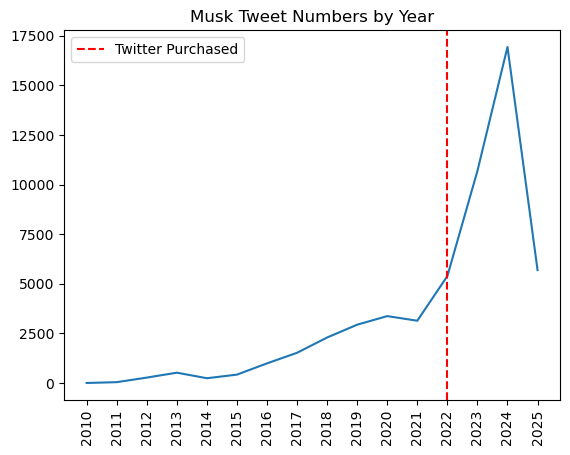

In [98]:
#bar_plot = plt.bar(musk_tweets_day_grouped['year'], height=musk_tweets_day_grouped['orig_tweet_id'])
plt.plot(musk_tweets_day_grouped['year'], musk_tweets_day_grouped['id'])
#xline('2022')
#plt.xlim('2022')
plt.axvline(x='2022', color='r', linestyle='dashed', label='Twitter Purchased')
plt.xticks(rotation=90)
plt.title('Musk Tweet Numbers by Year')
plt.legend()
plt.show()

In [147]:
stop_words = list(nltk.corpus.stopwords.words('english'))
stop_words.append('rt')

def tweet_to_tokens(tweet):
    tweet = tweet.lower()
    # if '@' and ':' in tweet: # is a reply
    #     tweet = tweet[tweet.find(':'):] # remove usernames
    tweet = re.sub(r'[^\w\s]','',tweet)
    tokens = nltk.word_tokenize(tweet)
    return [x for x in tokens if x not in stop_words]

musk_orginals = musk_tweets[musk_tweets['isQuote'] == False].copy().reset_index(drop=True)
musk_orginals['tokens'] = musk_orginals['fullText'].apply(tweet_to_tokens)
musk_orginals['tokens']

0        [one, day, words, science, choose, science, mu...
1                 [atatürk, anıtkabir, httpstcoal3wt0njr6]
2        [uncover007, 500, ft, far, 2, miles, long, thr...
3        [picture, boring, company, la, tunnel, taken, ...
4        [whiskey, fire, smores, jc, also, hotdog, hotd...
                               ...                        
47170                                  [tunguz, haha, wow]
47171                                          [alx, cool]
47172                       [alx, activist, posing, judge]
47173                               [billym2k, absolutely]
47174              [donaldjtrumpjr, tulsigabbard, exactly]
Name: tokens, Length: 47175, dtype: object

In [161]:
api_key = "02d47a40800f4d8dbdcf6dc1a09a6a25"
input_claim = musk_orginals['fullText'][0]

api_endpoint = f"https://idir.uta.edu/claimbuster/api/v2/score/text/{input_claim}"
request_headers = {"x-api-key": api_key}

api_response = requests.get(url=api_endpoint, headers=request_headers)

<Response [200]>

In [165]:
response_dict = json.loads(api_response.text)

for i in response_dict:
    print(i, " ", response_dict[i], '\n')

version   2 

claim   "If one day, my words are against science, choose science."
Mustafa Kemal Atatürk 

results   [{'text': '"If one day, my words are against science, choose science."\r\nMustafa Kemal Atatürk', 'index': 0, 'score': 0.2450297549}] 

